In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as m
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Specify the path to your CSV file
# data_path = 'E:\\THESIS\\MS\\Data Collection - Preparation\\rg1-revised-cleaned-with-popcount-and-neighbors.csv'
data_path = '/content/drive/MyDrive/MS thesis/HFCAI/MIMAROPA/mimaropa_cleaned.csv'
df = pd.read_csv(data_path)
df.head(2)

,ID,barangay_name,city_name,province_name,children,elderly,women,youth,women_rep,ph_all,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km
0,2283925,Pag-Asa (Pob.),Kalayaan,Palawan,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0,0,0,2283925,0.111098
1,2285307,Pag-Asa (Pob.),Kalayaan,Palawan,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0,0,0,2285307,0.053514


In [4]:
# Rename columns
column_mapping = {
    'children': 'popden_chi',
    'elderly': 'popden_eld',
    'women': 'popden_wom',
    'youth': 'popden_w_1',
    'women_rep': 'popden_you',
    'ph_all': 'popden_all',
}

df = df.rename(columns=column_mapping)
df.loc[df['RHU_Presence'] == 1, 'Distance_to_Nearest_RHU_km'] = 0
df[df['RHU_Presence'] == 1]

,ID,barangay_name,city_name,province_name,popden_chi,popden_eld,popden_wom,popden_w_1,popden_you,popden_all,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km
5734,2839509,Poblacion,Taytay,Palawan,1.624737,0.536436,5.734645,2.193217,2.818663,17.425051,2.879051,0.580553,0.701919,0.0,1,0,1,2839509,0.0
6795,2883646,Salvacion,Busuanga,Palawan,0.518355,0.249014,2.127627,0.899499,1.082447,3.235164,0.897642,1.378317,0.908585,1.0,1,0,1,2883646,0.0
7660,2916707,Kanluran (Pob.),Looc,Occidental Mindoro,0.469254,0.646156,2.482225,0.919866,1.157755,0.708694,0.920674,1.187317,0.791185,0.0,1,0,1,2916707,0.0
8178,2954054,Poblacion 8 (Barangay 8),Mamburao,Occidental Mindoro,0.632031,0.415303,2.958917,1.093162,1.549412,14.073026,1.010390,1.348470,1.182400,0.0,1,0,1,2954054,0.0
8894,2980346,Ligaya,Sablayan,Occidental Mindoro,1.265298,0.374528,3.892057,1.351338,1.649949,1.632764,0.936996,1.476344,0.976002,0.0,1,0,1,2980346,0.0
9146,2987241,Pag-Asa,Sablayan,Occidental Mindoro,3.698408,1.147100,13.171871,5.943164,6.927099,0.233800,0.880599,1.490856,0.862059,1.0,1,0,0,2987241,0.0
9205,2988623,Pag-Asa,Sablayan,Occidental Mindoro,NaN,NaN,NaN,NaN,NaN,0.186469,0.880599,1.490856,0.862059,1.0,1,0,0,2988623,0.0
10473,3010778,Mapaya,San Jose,Occidental Mindoro,0.647663,0.368906,2.608770,0.989608,1.278083,5.853419,1.166934,1.523879,1.093370,0.0,1,0,1,3010778,0.0
11990,3042548,Waygan,Mansalay,Oriental Mindoro,10.148301,4.548354,40.401026,17.023089,19.968240,4.238176,0.909479,1.626063,0.985809,1.0,1,0,1,3042548,0.0
12016,3043909,Poblacion,Bansud,Oriental Mindoro,0.782915,0.412617,2.985657,1.093965,1.409247,8.489880,1.179519,1.412059,1.101816,0.0,1,0,1,3043909,0.0


In [7]:
# Get column names with NaNs using list comprehension
columns_with_nan = [col for col in df.columns if df[col].isna().any()]

# Print the column names
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: ['popden_chi', 'popden_eld', 'popden_wom', 'popden_w_1', 'popden_you', 'popden_all', 'rain intensity_value', 'buildability_landcov']


In [8]:
# Impute NaNs with 0, considering data type safety
for col in columns_with_nan:
    # Check data type before imputing (avoid unintended conversions)
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(0)  # Impute with 0 for numeric columns
    else:
        df[col] = df[col].fillna('NA')  # Impute with 'NA' for non-numeric columns
df

,ID,barangay_name,city_name,province_name,popden_chi,popden_eld,popden_wom,popden_w_1,popden_you,popden_all,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km
0,2283925,Pag-Asa (Pob.),Kalayaan,Palawan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0,0,2283925,0.111098
1,2285307,Pag-Asa (Pob.),Kalayaan,Palawan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0,0,2285307,0.053514
2,2561919,Agutayan,Balabac,Palawan,0.000000,0.000000,0.000000,0.000000,0.000000,1.199699,0.488369,0.933480,0.894437,0.0,0,0,0,2561919,0.084980
3,2561920,Agutayan,Balabac,Palawan,5.248662,0.761903,14.941755,5.164006,6.814795,0.865716,0.488369,0.933480,0.894437,0.0,0,0,0,2561920,0.109652
4,2561921,Agutayan,Balabac,Palawan,0.000000,0.000000,0.000000,0.000000,0.000000,1.231306,0.488369,0.933480,0.894437,0.0,0,0,0,2561921,0.035876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13415,3173847,Taguilos,Cajidiocan,Romblon,3.990961,3.058940,15.485885,5.066370,6.213472,3.974471,1.179497,1.523419,0.637204,0.0,0,1,1,3173847,0.185783
13416,3173848,Taguilos,Cajidiocan,Romblon,2.464797,2.095278,10.084937,3.544118,4.188522,4.854084,1.179497,1.523419,0.637204,0.0,0,0,1,3173848,0.190227
13417,3173849,Gutivan,Cajidiocan,Romblon,5.208500,4.280252,22.458432,8.251089,10.159153,15.266185,1.234522,1.579866,0.638410,0.0,0,1,0,3173849,0.214736
13418,3173850,Cambajao,Cajidiocan,Romblon,1.481912,0.887197,5.250063,1.696399,2.164371,11.118409,1.205499,1.642626,0.637841,0.0,0,0,1,3172468,1.164647


In [16]:
columns_with_nan = [col for col in df.columns if df[col].isna().any()]
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: []


In [17]:
def HCI_calc(total_ai, total_gi, total_hi, total_ji, total_ki, total_mi,
              distance, road_bi, POI_ci, landCov_di, hazard1_ei, hazard2_ei, hazard3_ei, rhus_fi):

    total_vulnerable = total_gi + total_hi + total_ji + total_ki + total_mi
    total_pop = total_ai
    population_to_be_served = total_vulnerable + np.maximum(0, total_pop - total_vulnerable)

    # Calculate y for the entire Series without using if condition
    y = np.where(population_to_be_served == 0, 0, 20000 / ((population_to_be_served) * (distance + rhus_fi)))
    mc = np.tanh(y)

    w_bi = 0.3 # roads
    w_ci = 0.2 # POIs
    w_di = 0.5 # land cov

    b = (POI_ci * w_ci) + (road_bi * w_bi) + (landCov_di * w_di)

    # Normalize each factor
    rain_intensity_normalized = (hazard1_ei - hazard1_ei.min()) / (hazard1_ei.max() - hazard1_ei.min())
    flood_probability_normalized = (hazard2_ei - hazard2_ei.min()) / (hazard2_ei.max() - hazard2_ei.min())
    drought_mean_normalized = (hazard3_ei - hazard3_ei.min()) / (hazard3_ei.max() - hazard3_ei.min())
    w_rain = 0.4
    w_flood = 0.3
    w_drought = 0.3
    c = (w_rain * rain_intensity_normalized) + (w_flood * flood_probability_normalized) + (w_drought * drought_mean_normalized)

    f = b - c
    f = np.tanh(f)

    hci = mc * f
    hcfai = (1 + np.tanh(hci / 2)) / 2  # Sigmoid function

    return hcfai

In [18]:
# VARIABLES
# population vulnerable
popall = df["popden_all"]
children = df["popden_chi"]
elderly = df["popden_eld"]
women = df["popden_wom"]
women_reproductive = df["popden_w_1"]
youth = df["popden_you"]
distance = df["Distance_to_Nearest_RHU_km"]

flood = df["flood_probability_value"]
rain_intensity = df["rain intensity_value"]
drought = df["drought_value"]
roads = df["Road_Presence"]
rhus = df["RHU_Presence"]
pois = df["POI_Presence"]
buildability = df["buildability_landcov"]

In [19]:
df['HCFAI'] = HCI_calc(popall, children, elderly, women, women_reproductive, youth, distance,
    roads, pois, buildability, drought, rain_intensity, flood, rhus)

# Data exploration and visualization

In [20]:
print(max(list(df['HCFAI'].unique())))
# list(df['HCFAI'].unique())
print(min(list(df['HCFAI'].unique())))
# list(df['drought_value'])
# list(df['rain intensity_value'])
# list(df['flood_probability_value'])
for col in df.columns:
  print(col)

0.6407074628433035
0.35331905340745984
ID
barangay_name
city_name
province_name
popden_chi
popden_eld
popden_wom
popden_w_1
popden_you
popden_all
flood_probability_value
rain intensity_value
drought_value
buildability_landcov
RHU_Presence
Road_Presence
POI_Presence
Nearest_RHU
Distance_to_Nearest_RHU_km
HCFAI


In [21]:
# mid_to_high = []
# for i in list(df['HCFAI']):
#     if i >= 0.53:
#         mid_to_high.append(i)

# filtered_original_df = df[df['HCFAI'].isin(mid_to_high)]
# filtered_original_df = df[df['RHU_Presence'] == 1]

# x = df['HCFAI'].notna() # removing nan values
# x = df[x]
x=df[['popden_all', 'popden_you', "popden_w_1",
                      "popden_wom", "popden_eld", 'popden_chi',
                      'Distance_to_Nearest_RHU_km', "POI_Presence", "Road_Presence", "RHU_Presence",
                      'buildability_landcov', "drought_value", "rain intensity_value",
                         "flood_probability_value", "HCFAI"]]
x = x.sort_values(by='HCFAI', ascending=False)
# x[x['RHU_Presence']==0] # 4674 rows
x # 13420 rows
# len(locs_with_RHU['RHU_Presence'])

,popden_all,popden_you,popden_w_1,popden_wom,popden_eld,popden_chi,Distance_to_Nearest_RHU_km,POI_Presence,Road_Presence,RHU_Presence,buildability_landcov,drought_value,rain intensity_value,flood_probability_value,HCFAI
4070,1.625802,1.117868,0.914620,2.264191,0.260158,0.626006,8.168878e-02,1,1,0,1.0,0.786181,0.427302,0.585361,0.640707
1395,0.584994,5.982707,4.625546,12.312057,1.220108,3.890894,1.763870e-13,1,1,0,1.0,0.857399,0.728775,0.716115,0.629325
13213,1.693352,7.936651,7.482364,17.129269,3.073114,4.088578,5.638798e-02,1,1,0,1.0,0.618284,1.612117,0.282019,0.627694
13229,2.101738,9.963777,9.393347,21.156029,3.552753,4.888679,5.332549e-03,1,1,0,1.0,0.618284,1.612117,0.282019,0.627694
13393,4.519091,11.490773,9.727073,24.771970,3.099837,6.039337,1.600310e-01,1,1,0,1.0,0.619866,1.572273,0.359864,0.627504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13060,3.341918,1.176650,0.899791,2.915670,0.635910,0.674844,4.380666e-02,0,0,0,0.0,0.897543,2.241198,1.704563,0.354141
12699,2.236630,1.599855,1.232491,3.710392,0.797155,0.787743,0.000000e+00,0,0,0,0.0,0.908025,2.249281,1.662442,0.353981
12882,2.565355,0.000000,0.000000,0.000000,0.000000,0.000000,1.658969e-01,0,0,0,0.0,0.930821,2.207907,1.646268,0.353929
12936,0.224720,1.098053,0.950759,2.388346,0.644121,0.421450,7.264482e-03,0,0,0,0.0,0.928646,2.196945,1.730164,0.353319


In [22]:
locs_with_RHU = x[x['RHU_Presence']==1] # 27 rows (bcos there are nan values we disregarded)
locs_with_RHU

,popden_all,popden_you,popden_w_1,popden_wom,popden_eld,popden_chi,Distance_to_Nearest_RHU_km,POI_Presence,Road_Presence,RHU_Presence,buildability_landcov,drought_value,rain intensity_value,flood_probability_value,HCFAI
6795,3.235164,1.082447,0.899499,2.127627,0.249014,0.518355,0.0,1,0,1,1.0,0.908585,1.378317,0.897642,0.543247
11990,4.238176,19.968240,17.023089,40.401026,4.548354,10.148301,0.0,1,0,1,1.0,0.985809,1.626063,0.909479,0.529423
12791,2.379859,1.053222,0.878365,2.342721,0.401517,0.549259,0.0,0,0,1,1.0,0.805726,1.630205,0.395868,0.502843
9146,0.233800,6.927099,5.943164,13.171871,1.147100,3.698408,0.0,0,0,1,1.0,0.862059,1.490856,0.880599,0.494002
9205,0.186469,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0,1,1.0,0.862059,1.490856,0.880599,0.494002
7660,0.708694,1.157755,0.919866,2.482225,0.646156,0.469254,0.0,1,0,1,0.0,0.791185,1.187317,0.920674,0.435449
5734,17.425051,2.818663,2.193217,5.734645,0.536436,1.624737,0.0,1,0,1,0.0,0.701919,0.580553,2.879051,0.426319
13101,9.192730,3.355738,2.441226,7.158484,1.308967,1.518430,0.0,1,0,1,0.0,0.701968,1.687881,1.184290,0.422451
8894,1.632764,1.649949,1.351338,3.892057,0.374528,1.265298,0.0,1,0,1,0.0,0.976002,1.476344,0.936996,0.414297
12443,17.434322,6.936740,5.501117,14.525108,2.291515,3.418586,0.0,1,0,1,0.0,0.916643,1.942460,0.764801,0.408019


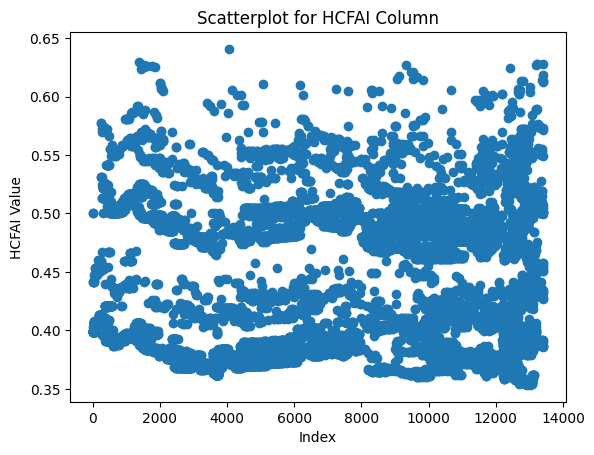

In [23]:
# Scatterplot for the 'HCFAI' column
plt.scatter(x.index, x['HCFAI'])
plt.title('Scatterplot for HCFAI Column')
plt.xlabel('Index')
plt.ylabel('HCFAI Value')
plt.show()

# Feasibility Factors

In [ ]:
# a = a['buildability_landcov'].notna()
a = df[['Road_Presence', 'POI_Presence', 'RHU_Presence', 'buildability_landcov',
       'drought_value', 'rain intensity_value', 'flood_probability_value', 'HCFAI']]

a = a[a['RHU_Presence']==0]
a = a.sort_values(by='HCFAI', ascending=False)
a

,Road_Presence,POI_Presence,RHU_Presence,buildability_landcov,drought_value,rain intensity_value,flood_probability_value,HCFAI
5048,1,1,0,1.0,0.960775,0.430949,0.687815,0.654064
2596,1,1,0,1.0,1.141953,0.249932,0.361025,0.651058
1121,1,1,0,1.0,1.111672,0.289567,0.461596,0.650529
5267,1,0,0,1.0,0.848824,0.427353,0.224119,0.645940
5194,1,0,0,1.0,0.848824,0.427353,0.224119,0.645939
...,...,...,...,...,...,...,...,...
5590,0,0,0,NaN,1.046655,0.516940,0.426333,NaN
5591,0,0,0,NaN,1.088014,0.533677,0.440750,NaN
5596,1,1,0,NaN,0.864514,2.721783,0.598195,NaN
5680,0,1,0,NaN,0.797894,2.648136,1.438344,NaN


# Maximal Coverage Factors

In [ ]:
b = df[['popden_you', 'popden_wom', 'popden_eld', 'popden_chi',
       'popden_w_1', 'popden_all', 'Distance_to_Nearest_RHU_km', 'RHU_Presence', 'HCFAI']]
# b = b[b['buildability_landcov']==1]
b = b.sort_values(by='HCFAI', ascending=False)
# b[b['RHU_Presence']==1]
b

,popden_you,popden_wom,popden_eld,popden_chi,popden_w_1,popden_all,Distance_to_Nearest_RHU_km,RHU_Presence,HCFAI
5048,13.736079,41.149321,8.824771,8.173794,20.816993,363.896997,17.384668,0,0.654064
2596,5.296137,14.032293,2.747063,3.143041,6.904777,155.815402,31.481358,0,0.651058
1121,28.689414,77.553834,12.481618,19.290638,36.829012,125.914306,11.550333,0,0.650529
5267,0.000000,0.000000,0.000000,0.000000,0.000000,41.771628,25.204817,0,0.645940
5194,0.000000,0.000000,0.000000,0.000000,0.000000,124.261193,23.798066,0,0.645939
...,...,...,...,...,...,...,...,...,...
5590,0.000000,0.000000,0.000000,0.000000,0.000000,176.080449,19.736373,0,NaN
5591,0.000000,0.000000,0.000000,0.000000,0.000000,27.348926,19.029579,0,NaN
5596,46.984025,121.805750,14.989535,29.475215,64.996635,370.507160,15.552309,0,NaN
5680,0.000000,0.000000,0.000000,0.000000,0.000000,4.127558,18.802216,0,NaN


# EDA

In [ ]:
c=df['HCFAI'].notna()
c = df[c]
# c = df[['population_youth', 'population_women', 'population_elder60plus', 'population_children_under5',
#        'population_reproductive_women', 'popden_all_total_population', 'Distance_to_Nearest_RHU_km',
#         'Road_Presence', 'POI_Presence', 'RHU_Presence', 'buildability_landcov', 'drought_value', 'rain intensity_value',
#         'flood_probability_value', 'HCFAI']]
# c = c[c['RHU_Presence']==1]
c = c.sort_values(by='HCFAI', ascending=False)
c = c[['population_youth', 'population_women', 'population_elder60plus', 'population_children_under5',
       'population_reproductive_women', 'popden_all_total_population', 'Distance_to_Nearest_RHU_km',
        'Road_Presence', 'POI_Presence', 'RHU_Presence', 'buildability_landcov', 'drought_value', 'rain intensity_value',
        'flood_probability_value', 'HCFAI']]
c.sort_values(by='HCFAI', ascending=False)

,population_youth,population_women,population_elder60plus,population_children_under5,population_reproductive_women,popden_all_total_population,Distance_to_Nearest_RHU_km,Road_Presence,POI_Presence,RHU_Presence,buildability_landcov,drought_value,rain intensity_value,flood_probability_value,HCFAI
5703,0.000000,0.000000,0.0,0.000000,0.000000,376.429135,18.697599,1,0,0,1.0,0.542848,2.371210,0.962631,0.581876
1099,0.000000,0.000000,0.0,0.000000,0.000000,466.445625,24.862448,0,0,0,1.0,0.672856,0.268539,0.305392,0.563102
4334,0.000000,0.000000,0.0,0.000000,0.000000,1139.223628,29.861002,0,0,0,1.0,0.713175,0.153043,0.229447,0.534900
2704,0.000000,0.000000,0.0,0.000000,0.000000,23.816927,10.621421,0,0,0,1.0,0.834131,0.092033,0.815355,0.521743
3490,0.000000,0.000000,0.0,0.000000,0.000000,693.544396,13.991199,0,0,0,1.0,0.884191,0.099185,0.681102,0.516955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3900,11520.305136,21600.533088,0.0,2880.050256,12960.330264,50247.186329,2.858075,0,0,0,0.0,0.783897,2.857803,0.389312,0.481524
3937,0.000000,0.000000,0.0,0.000000,0.000000,2736.210123,11.314957,0,0,0,1.0,0.795406,1.766906,1.284616,0.480502
944,0.000000,0.000000,0.0,0.000000,0.000000,5875.884038,10.289214,0,0,0,0.0,0.686629,0.277878,0.934151,0.473992
5,0.000000,0.000000,0.0,0.000000,0.000000,4021.250203,16.685262,0,0,0,0.0,0.800627,1.151205,0.700863,0.467737


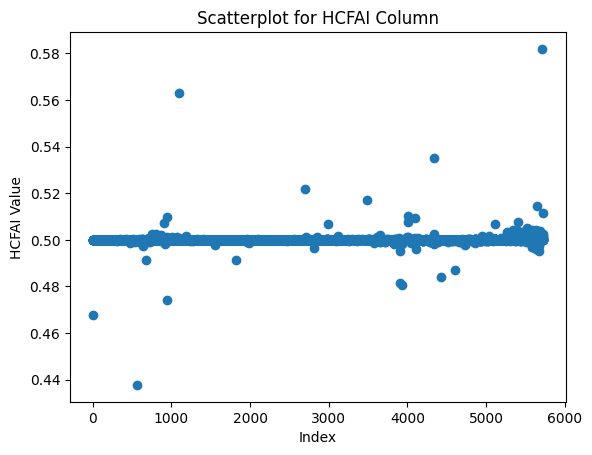

In [ ]:
# Scatterplot for the 'HCFAI' column
plt.scatter(c.index, c['HCFAI'])
plt.title('Scatterplot for HCFAI Column')
plt.xlabel('Index')
plt.ylabel('HCFAI Value')
plt.show()

# Exporting

In [24]:
# Specify the file path for the CSV file
region = 'mimaropa'
csv_file_path = f'/content/drive/MyDrive/MS thesis/HFCAI/MIMAROPA/{region}_HCFAI.csv'
# Export the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)
print(f'DataFrame exported to CSV file: {csv_file_path}')

DataFrame exported to CSV file: /content/drive/MyDrive/MS thesis/HFCAI/MIMAROPA/mimaropa_HCFAI.csv
